In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

In [2]:
def read_img(path):
    return plt.imread(path)[40:400, 75:465, :]

image_paths = [path for path in listdir() if path.endswith('.jpg')]
print(f'Detected {len(image_paths)} image(s) ...\n- ' + '\n- '.join(image_paths))

image_data = np.array([read_img(path).flatten() for path in image_paths])
image_data.shape


Detected 17 image(s) ...
- left right 1.jpg
- left right 2.jpg
- left right 3.jpg
- push 2.jpg
- push 3.jpg
- push 4.jpg
- swipe down 1.jpg
- swipe down 2.jpg
- swipe left 1.jpg
- swipe left 3.jpg
- swipe right 1.jpg
- swipe right 2.jpg
- swipe up 2.jpg
- swipe up 3.jpg
- switching 2.jpg
- switching 3.jpg
- switching 4.jpg


(17, 421200)

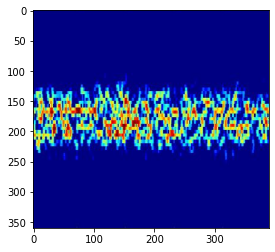

In [3]:
plt.imshow(image_data[0, :].reshape(360, 390, 3));

In [4]:
from sklearn.cluster import KMeans, MeanShift
kmeans = KMeans(n_clusters=7, random_state=0).fit(image_data)
kmeans.labels_

array([3, 4, 3, 1, 1, 1, 0, 2, 0, 0, 0, 0, 5, 6, 0, 0, 0])

In [5]:
meanshift = MeanShift(bandwidth=7).fit(image_data)
meanshift.labels_

array([ 0,  4,  0,  7,  8,  6,  3,  1, 14, 11,  5, 13,  2, 15, 10,  9, 12],
      dtype=int64)